In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install tensorflow tensorflow-io matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 34.9 MB/s eta 0:00:00


In [3]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

In [ ]:
tf.__version__


'2.15.0'

In [ ]:
! pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0
    Uninstalling tenso

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
import tensorflow_io as tfio

print(tfio.__version__)

0.36.0


In [ ]:
import tensorflow_io as tfio

print(tfio.__version__)

0.36.0


In [4]:
CAPUCHIN_FILE = os.path.join("/content/drive/MyDrive/data/Parsed_Capuchinbird_Clips/XC3776-3.wav")
#/content/drive/MyDrive/data/Parsed_Capuchinbird_Clips
#"data/Parsed_Capuchinbird_Clips/XC3776-3.wav"
NOT_CAPUCHIN_FILE = os.path.join("/content/drive/MyDrive/data/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav")

In [5]:
CAPUCHIN_FILE

'/content/drive/MyDrive/data/Parsed_Capuchinbird_Clips/XC3776-3.wav'

In [65]:
#from tensorflow website
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) mono audio rather than stereo type
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis - wav shape will be (132300,1)
    wav = tf.squeeze(wav, axis=-1)
    #cast into int64 dtype - change the dtype from float32 to int64
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [66]:
file_contents = tf.io.read_file(CAPUCHIN_FILE)
file_contents

<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF\xbc\t\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00data\x98\t\x04\x00\xc5\xf1(\xfb\x7f\x07F\x13|\x1c\xa3$\x07.R8\x03A\xbaF\xb6J\xb4NQR\x92S\x95Q\xa1M/I\xb3CJ;\x88/\xa2"X\x17\x12\x0e\xce\x04\xdd\xf9\x07\xeei\xe3\xc3\xda\xa5\xd2\xae\xc9\xc4\xc0P\xbaB\xb7\xb5\xb5-\xb3\xaa\xaf\xad\xad\x00\xafd\xb22\xb5\xeb\xb6\xf5\xb9m\xc0\x1e\xc9\xc6\xd0-\xd6\xba\xdbO\xe4[\xefG\xf9\xd2\xff\xc3\x04\x87\x0b\xec\x14m\x1e\xc6%\xc4+\xb22\xa3:\xd7@\x17C\x86B8BoC[D\xc5B\xda>\x9e:\x117\xeb2`,_#\x93\x19\x82\x10X\x08M\x00\xb2\xf7j\xee\t\xe5\xc1\xdc\xbc\xd6\xf3\xd2\xeb\xcfV\xcc\x1c\xc9\xc5\xc8b\xcc\x95\xd1\xe6\xd4\xe4\xd5\xda\xd7\xb2\xdd\x13\xe6\xf3\xec\xc8\xf0\x99\xf4\x00\xfc@\x06\xed\x0eX\x13\x94\x154\x19:\x1e!!\xcb\x1fj\x1cu\x1a\xdd\x19A\x17\xd6\x100\t\t\x04f\x01\xd3\xfd_\xf7\x84\xf0\xf7\xec\xb5\xec\x16\xec\xc1\xe8\xd8\xe4.\xe4V\xe72\xeb<\xed\xad\xeeb\xf2\xc1\xf8E\xff\x00\x04\x04\x08t\r!\x14\x83\x19\xfe\x1b\xd6\x1cJ\x1e\x

In [67]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

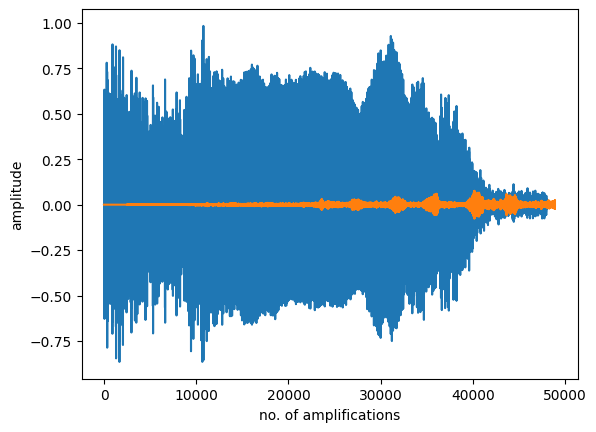

In [68]:
plt.plot(wave) #capuchin - blue
plt.plot(nwave) #not cpuchin - orange
plt.xlabel("no. of amplifications")
plt.ylabel("amplitude")
plt.show()

## Create TF dataset (pipeline)

In [69]:
cap = os.path.join("/content/drive/MyDrive/data/Parsed_Capuchinbird_Clips/")
not_cap = os.path.join("/content/drive/MyDrive/data/Parsed_Not_Capuchinbird_Clips/")

In [70]:
import numpy as np
#list_files -> go in to the specified path and look into the .wav files
#create the dataset appropriate to TF. then can iterate through -> as_numpy_iterator
CAP = tf.data.Dataset.list_files(cap+'*.wav')
NOT_CAP = tf.data.Dataset.list_files(not_cap+'*.wav')
#check for .wav files in the particular directory
CAP.as_numpy_iterator().next()

b'/content/drive/MyDrive/data/Parsed_Capuchinbird_Clips/XC216012-11.wav'

In [71]:
len(CAP),len(NOT_CAP)

(217, 593)

In [72]:
# Need to run load_wav_16k_mono function on each file on the created TF dataset

In [73]:
#zip -> concatenate two files in line
#here we label all the audio files with whether its a cap bird or not (cap-1, not_cap-0)
cap_sounds = tf.data.Dataset.zip((CAP, tf.data.Dataset.from_tensor_slices(tf.ones(len(CAP)))))
not_cap_sounds = tf.data.Dataset.zip((NOT_CAP, tf.data.Dataset.from_tensor_slices(tf.zeros(len(NOT_CAP)))))
#combine all cap and not_cap files together -> later we can shuffle if needed
data = cap_sounds.concatenate(not_cap_sounds)

In [74]:
#check for the labels with audio file
cap_sounds.as_numpy_iterator().next()

(b'/content/drive/MyDrive/data/Parsed_Capuchinbird_Clips/XC114131-2.wav', 1.0)

In [75]:
data.shuffle(100).as_numpy_iterator().next()

(b'/content/drive/MyDrive/data/Parsed_Capuchinbird_Clips/XC178168-6.wav', 1.0)

In [76]:
#lengths of wav file lengths
lengths = []
for file in os.listdir(os.path.join("/content/drive/MyDrive/data/Parsed_Capuchinbird_Clips/")):
    tensor_wave = load_wav_16k_mono(os.path.join("/content/drive/MyDrive/data/Parsed_Capuchinbird_Clips/", file))
    lengths.append(len(tensor_wave))

In [77]:
#this gives the average time of a pne wav file
tf.math.reduce_mean(lengths), tf.math.reduce_min(lengths), tf.math.reduce_max(lengths)
#mean time -> 54156/16000 Hz = 3.38s

(<tf.Tensor: shape=(), dtype=int32, numpy=54156>,
 <tf.Tensor: shape=(), dtype=int32, numpy=32000>,
 <tf.Tensor: shape=(), dtype=int32, numpy=80000>)

In [78]:
def process_spectrogram(file_path, label):
    wav = load_wav_16k_mono(file_path)

    #grabbing first 48000 amplitudes. it means 3 secs.
    #btw some wav s are 32000 lengthy. need to pad the remain length. add zeros to the front
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32) #zero padding
    wav = tf.concat([zero_padding, wav],0) #combine the remain zeros to the original wav file

    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32) #frame_length -> frame_length, frame_step -> number of samples to step
    spectrogram = tf.abs(spectrogram) #eliminate negative values
    spectrogram = tf.expand_dims(spectrogram, axis=2) #CNN needs at least one channel
    return spectrogram, label

In [149]:
#get capuchin birds sound files and iterate through each files
filepath, label = cap_sounds.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [150]:
spectrogram, label = process_spectrogram(filepath, label)

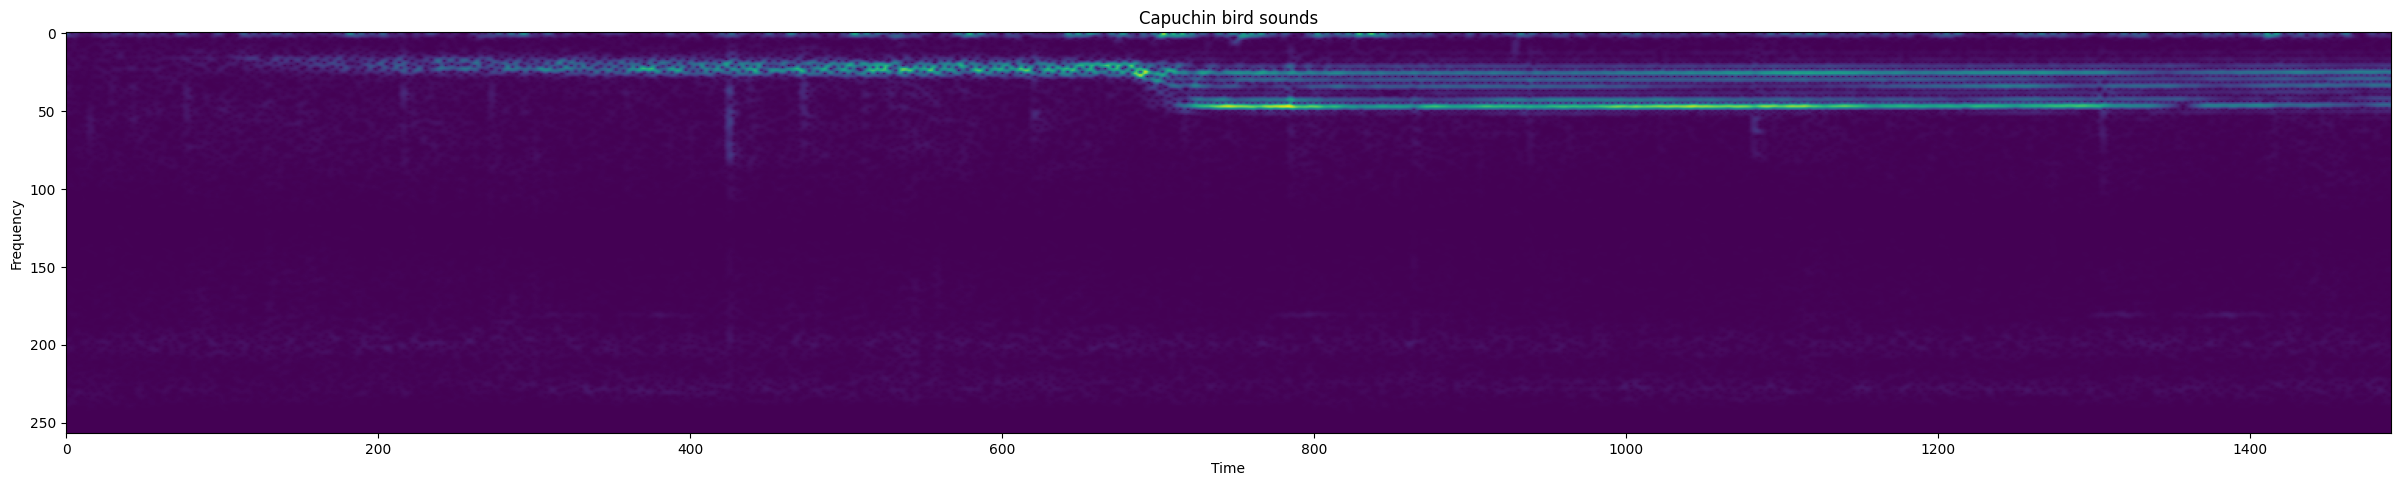

In [151]:
plt.figure(figsize=(30,20))
plt.title("Capuchin bird sounds")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [82]:
#get capuchin birds sound files and iterate through each files
filepath, label = not_cap_sounds.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [83]:
spectrogram, label = process_spectrogram(filepath, label)

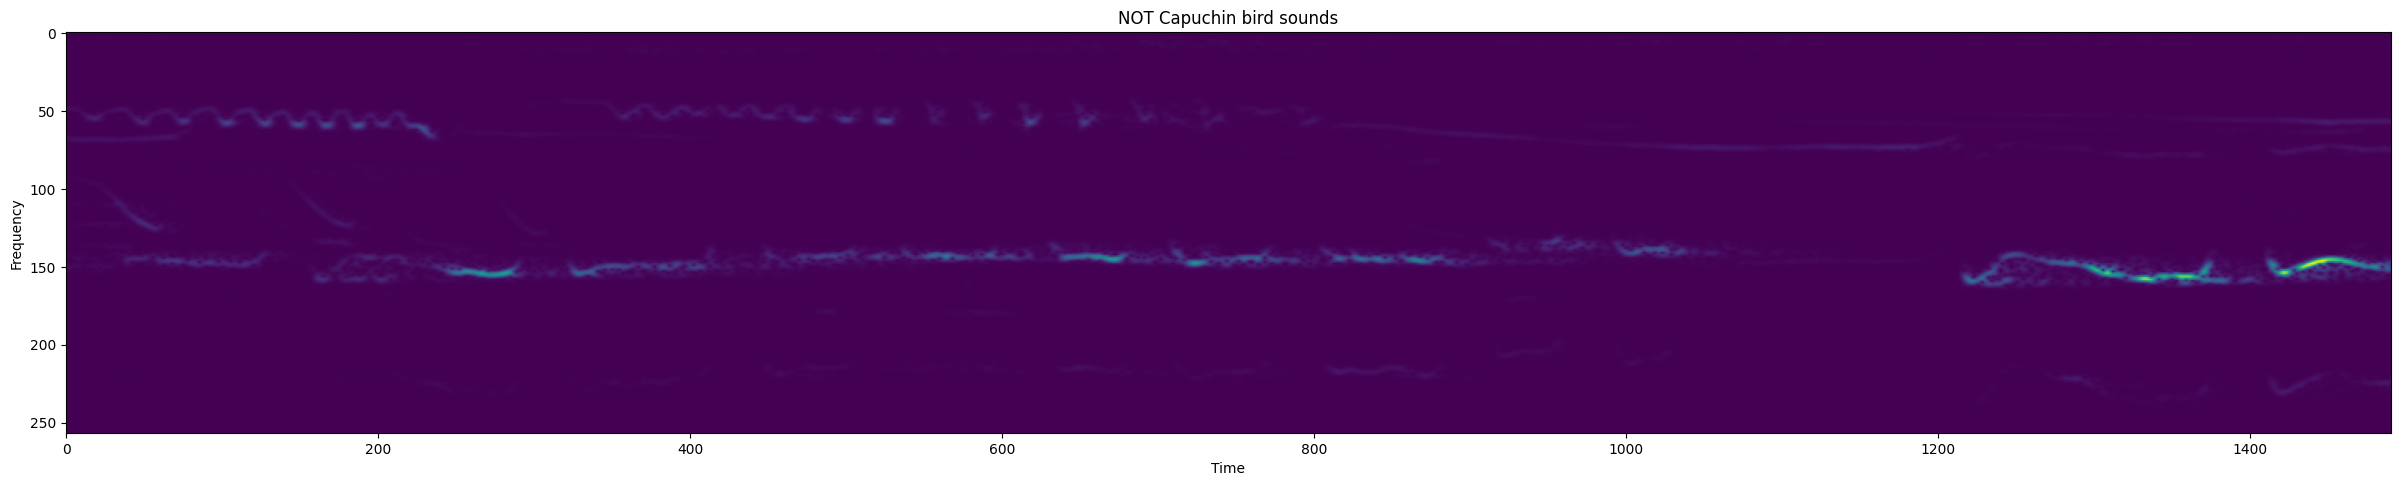

In [84]:
plt.figure(figsize=(30,20))
plt.title("NOT Capuchin bird sounds")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

## Build DL model
##### So far we have the data pipeline with auido file and the label. Need to run them through spectrogram function

In [85]:
data = data.map(process_spectrogram)
data = data.cache()
data = data.shuffle(buffer_size=1000) #shuffle the data
data = data.batch(16) #train 16 samples at a time
data = data.prefetch(8) #eliminate CPU bottlenecking if any;

In [86]:
#split to train and test

In [ ]:
len(data)*0.7

35.699999999999996

In [87]:
train = data.take(36) #36 comes as above, 70% from data pipiline
test = data.skip(36).take(15) #51-36=15

In [88]:
samples, labels = train.as_numpy_iterator().next()

In [89]:
samples.shape #16 samples per batch

(16, 1491, 257, 1)

In [95]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(1491, 257,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # 1 since the output will be 1 or 0,sigmoid since its a binary classification
])

In [96]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()]
)

In [97]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 1489, 255, 8)      80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 744, 127, 8)       0         
 D)                                                              
                                                                 
 conv2d_7 (Conv2D)           (None, 742, 125, 8)       584       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 371, 62, 8)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 184016)            0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [ ]:
# DROP COUPLE OF MAX POOLING LAYERS IN THE MIDDLE TO REDUCE NO. OF PARAMETERS. ITS TOOOOOO BIG

In [48]:
!nvidia-smi

Fri Feb  9 19:56:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0              31W /  70W |  14085MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [98]:
history = model.fit(train, epochs=5, validation_data=test, batch_size=16)

Epoch 1/5
36/36 [==============================] - 4s 63ms/step - loss: 0.2634 - recall_2: 0.8544 - precision_2: 0.8491 - val_loss: 0.1266 - val_recall_2: 0.7170 - val_precision_2: 1.0000
Epoch 2/5
36/36 [==============================] - 2s 49ms/step - loss: 0.0798 - recall_2: 0.9419 - precision_2: 0.9669 - val_loss: 0.0540 - val_recall_2: 0.9434 - val_precision_2: 0.9804
Epoch 3/5
36/36 [==============================] - 2s 53ms/step - loss: 0.0461 - recall_2: 0.9565 - precision_2: 1.0000 - val_loss: 0.0334 - val_recall_2: 0.9825 - val_precision_2: 1.0000
Epoch 4/5
36/36 [==============================] - 2s 50ms/step - loss: 0.0205 - recall_2: 0.9868 - precision_2: 0.9933 - val_loss: 0.0580 - val_recall_2: 0.9403 - val_precision_2: 1.0000
Epoch 5/5
36/36 [==============================] - 2s 50ms/step - loss: 0.0353 - recall_2: 0.9632 - precision_2: 0.9937 - val_loss: 0.0196 - val_recall_2: 1.0000 - val_precision_2: 1.0000


In [100]:
#check this out
# Access the dictionary values directly
print(history.history)

{'loss': [0.2634352445602417, 0.07983127236366272, 0.04611511528491974, 0.02054774947464466, 0.035271055996418], 'recall_2': [0.8544303774833679, 0.9419354796409607, 0.95652174949646, 0.9867549538612366, 0.9631901979446411], 'precision_2': [0.849056601524353, 0.9668874144554138, 1.0, 0.9933333396911621, 0.9936708807945251], 'val_loss': [0.12664484977722168, 0.0539889931678772, 0.03337204456329346, 0.05795372277498245, 0.019556421786546707], 'val_recall_2': [0.7169811129570007, 0.9433962106704712, 0.9824561476707458, 0.9402984976768494, 1.0], 'val_precision_2': [1.0, 0.9803921580314636, 1.0, 1.0, 1.0]}


In [103]:
print(history.history.keys())

dict_keys(['loss', 'recall_2', 'precision_2', 'val_loss', 'val_recall_2', 'val_precision_2'])


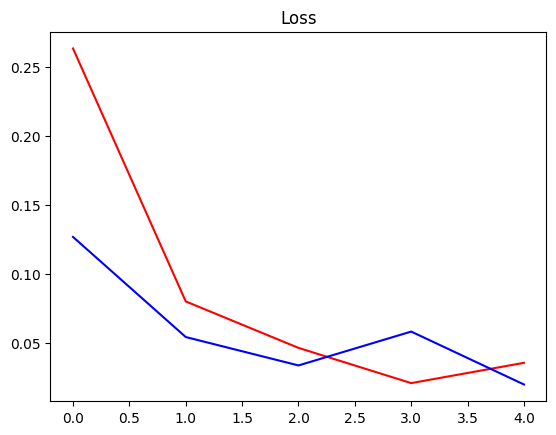

In [101]:
#look at the losses in each epoch
plt.title('Loss')
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.show()

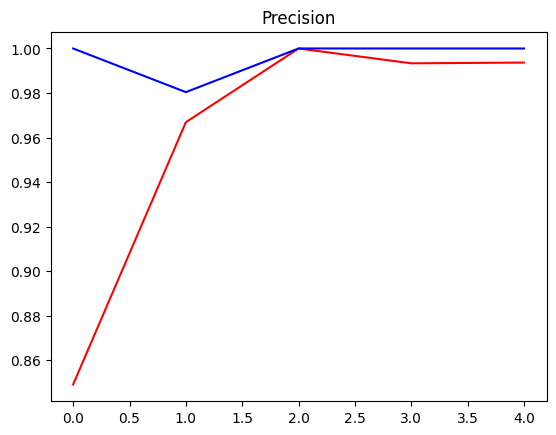

In [104]:
#look at the precisions in each epoch
plt.title('Precision')
plt.plot(history.history['precision_2'], 'r')
plt.plot(history.history['val_precision_2'], 'b')
plt.show()

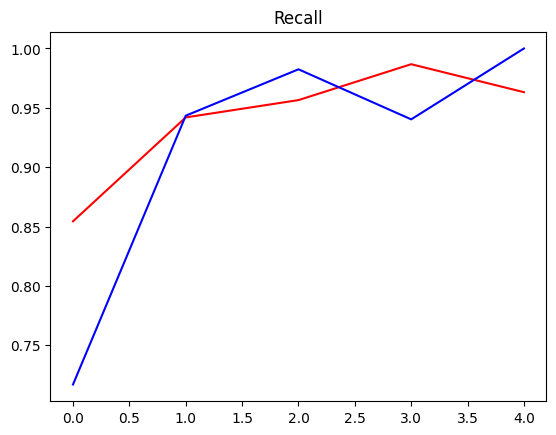

In [106]:
#look at the Recalls in each epoch
plt.title('Recall')
plt.plot(history.history['recall_2'], 'r')
plt.plot(history.history['val_recall_2'], 'b')
plt.show()

In [107]:
#going through batches iteratively
X_test, y_test = test.as_numpy_iterator().next()

In [108]:
#make predictions form the model
predictions = model.predict(X_test)
predictions

1/1 [==============================] - 0s 110ms/step


array([[9.9537764e-03],
       [3.1673390e-04],
       [1.9666483e-03],
       [9.9852258e-01],
       [6.1656311e-03],
       [4.7088261e-03],
       [3.6184827e-03],
       [9.2503138e-02],
       [9.5061488e-02],
       [3.1329120e-07],
       [3.2838942e-03],
       [2.1967920e-03],
       [2.4668407e-05],
       [1.0000000e+00],
       [2.5922151e-07],
       [1.0081851e-06]], dtype=float32)

In [109]:
#label from predicted values
predictions = [1 if prediction > 0.5 else 0 for prediction in predictions]

In [110]:
#check how many capuchin calls in a clip from predictions
tf.math.reduce_sum(predictions)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [111]:
#check how many capuchin calls in a clip from actual scenario
tf.math.reduce_sum(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

## Add Forest Audios

In [112]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [113]:
mp3 = os.path.join("/content/drive/MyDrive/data/Forest Recordings/recording_05.mp3")

In [114]:
wav = load_mp3_16k_mono(mp3)

In [115]:
#convert big forest files in to slices with same size as trained in model (3s)
#then there will be multiple predictions in one clip
#by assigning same values for sequence_length and sequence_stride prevent from overlapping when slicing the large audio file
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [116]:
#iterate through each clip
samples, index = audio_slices.as_numpy_iterator().next()

In [117]:
#check!!! # output will be 60 and it means there are 60 slices in the particular clip
len(audio_slices)

60

In [118]:
#length of one slice - 48000
samples.shape

(1, 48000)

## convert sliced windows of the clip to spectrograms


In [119]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram


In [120]:
#loop all slices through spectrogram process function - for 1 clip - 60 spectrograms
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

##### Increase the threshold value if the clip is predicting more consecutive 1s rather than hearing in the clip in actual scenario. So increase 0.5 upto 0.99

In [131]:
#make predictions from the trained model
pred_forest = model.predict(audio_slices)
pred_forest = [1 if prediction > 0.6 else 0 for prediction in pred_forest]

1/1 [==============================] - 0s 211ms/step


In [132]:
#predicted values for one clip - should be 60 values
pred_forest

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

### IMPORTANT
#### Here one capuchin call will be deteted as consecutive 1s when one call is more than 3s. So we are grouping the consecutive 1s and consider it as a one capuchin call.

In [133]:
from itertools import groupby

In [134]:
#loop through predictions to group consecutive 1s
pred_forest = [key for key, group in groupby(pred_forest)]
#this gives the prediction after grouping
pred_forest

[0]

In [135]:
#no of capuchin calls in the clip. AS PREDICTED
calls = tf.math.reduce_sum(pred_forest).numpy()

In [136]:
calls

0

## Loop over all recordings and make predictions

In [137]:
results = {}
for file in os.listdir(os.path.join("/content/drive/MyDrive/data/Forest Recordings/")):
    FILEPATH = os.path.join("/content/drive/MyDrive/data/Forest Recordings/", file)

    #run each of clips through to convert to wav files
    wav = load_mp3_16k_mono(FILEPATH)
    #sclicing all clips one by one
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    #convert them into spectrograms
    audio_slices = audio_slices.map(preprocess_mp3)
    #batch the slices
    audio_slices = audio_slices.batch(64)

    yhat = model.predict(audio_slices)

    results[file] = yhat

1/1 [==============================] - 0s 211ms/step


In [138]:
results

{'recording_01.mp3': array([[0.00193963],
        [0.00588839],
        [0.00059531],
        [0.00043866],
        [0.00232146],
        [0.00319255],
        [0.00243104],
        [0.00509328],
        [0.00275829],
        [0.00156431],
        [0.00527716],
        [0.00811649],
        [0.0110614 ],
        [0.00471757],
        [0.00326639],
        [0.00467632],
        [0.00365059],
        [0.00353071],
        [0.00471259],
        [0.00996187],
        [0.00379525],
        [0.01056745],
        [0.00097704],
        [0.00267046],
        [0.004477  ],
        [0.0132827 ],
        [0.00134333],
        [0.00533972],
        [0.00554498],
        [0.00208568],
        [0.00489826],
        [0.0022773 ],
        [0.00086255],
        [0.00262064],
        [0.0001685 ],
        [0.00225088],
        [0.00287984],
        [0.00113352],
        [0.00103315],
        [0.00047069],
        [0.00434272],
        [0.0005433 ],
        [0.00036992],
        [0.00032384],
        [0.0

In [139]:
class_preds = {}
for file, logits in results.items():
    ##label the predicted values to 1 or 0 using a threshold value
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'recording_01.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_06.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_07.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_08.mp3': [0,
  1,
  0,
  

In [140]:
#group all the consecutive detections as above for all forest audio clips
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'recording_01.mp3': 0,
 'recording_06.mp3': 5,
 'recording_07.mp3': 2,
 'recording_08.mp3': 25,
 'recording_04.mp3': 4,
 'recording_05.mp3': 0,
 'recording_00.mp3': 5,
 'recording_09.mp3': 0,
 'recording_02.mp3': 0,
 'recording_03.mp3': 0,
 'recording_24.mp3': 0,
 'recording_23.mp3': 5,
 'recording_18.mp3': 8,
 'recording_17.mp3': 3,
 'recording_11.mp3': 3,
 'recording_14.mp3': 0,
 'recording_27.mp3': 0,
 'recording_26.mp3': 2,
 'recording_10.mp3': 5,
 'recording_12.mp3': 6,
 'recording_21.mp3': 1,
 'recording_15.mp3': 2,
 'recording_13.mp3': 0,
 'recording_25.mp3': 1,
 'recording_20.mp3': 0,
 'recording_16.mp3': 3,
 'recording_19.mp3': 0,
 'recording_22.mp3': 2,
 'recording_42.mp3': 0,
 'recording_38.mp3': 1,
 'recording_44.mp3': 1,
 'recording_39.mp3': 2,
 'recording_43.mp3': 5,
 'recording_34.mp3': 4,
 'recording_28.mp3': 4,
 'recording_31.mp3': 1,
 'recording_41.mp3': 0,
 'recording_35.mp3': 0,
 'recording_30.mp3': 3,
 'recording_37.mp3': 3,
 'recording_40.mp3': 1,
 'recording_32.

In [141]:
import csv

In [142]:
#export results to a csv file
#'w' -> enable writing in the file
# delimiter=',' -> every value is sperated by a comma
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording_no.', 'no. of_capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])